<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/Malware_detection_assignment_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduce the problem

# Student Assignment: Malware Detection using API Calls
**Introduction:**
Malware detection is a critical task in cybersecurity. Malicious software, or malware, can cause significant damage to systems and data. One effective way to identify malware is by analyzing its behavior, specifically the sequence of Application Programming Interface (API) calls it makes. API calls are requests made by a program to the operating system or other software libraries to perform specific tasks. Malware often exhibits distinct patterns of API calls that differentiate it from benign software.
**Dataset Description:**
The dataset provided, "API_Functions.csv", contains information about API calls made by various software samples. Each row in the dataset likely represents a software sample, and the columns represent different API functions or sequences of API calls. There should also be a column indicating whether the software sample is "malware" or "benign". This dataset will serve as the basis for training and evaluating our malware detection models.
**Assignment Objective:**
The objective of this assignment is to build and compare different classification models for malware detection using the "API_Functions.csv" dataset. You will implement and evaluate the performance of several common machine learning algorithms, including Random Forest, K-Nearest Neighbors (KNN), Decision Tree, and Naive Bayes. You will also explore hyperparameter tuning to optimize the performance of these models.

## Load and explore the data


Load the dataset and display basic information as requested in the instructions.



In [2]:
import pandas as pd

# Load the dataset from the specified path.
# Make sure the file 'API_Functions.csv' is uploaded to the '/content/' directory in your Colab environment.
df = pd.read_csv('/content/API_Functions (1).csv')

In [3]:
# Display the first 5 rows of the DataFrame to get a glimpse of the data structure.
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,SHA256,Type,getaclinformation,getace,getsecuritydescriptordacl,regqueryvalueexa,regopenkeyexa,getsecurityinfo,isvalidsid,regclosekey,...,drawdibclose,ord1107,wsasetblockinghook,setupinstallfileexa,setupterminatefilelog,setuplogfilew,setupopenmasterinf,setupinstallfileexw,setupgetlinecountw,setupdigethwprofilefriendlynameexw
0,002ce0d28ec990aadbbc89df457189de37d8adaadc9c08...,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,dacbe8cb72dd746539792a50e84965fefef73feaa07b5d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,d3dc7512ce75db33b2c3063fa99245e9ca9fe3b086462f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b350fac81533f02981dc2176ed17163177d92d9405758e...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,dfee618043a47b7b09305df0ca460559d9f567ee246c7b...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Print concise summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage.
print("\nInformation about the DataFrame:")
df.info()


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Columns: 21920 entries, SHA256 to setupdigethwprofilefriendlynameexw
dtypes: int64(21919), object(1)
memory usage: 334.3+ MB


In [5]:
# Display descriptive statistics for numerical columns, providing insights into the distribution of features.
print("\nDescriptive statistics of numerical columns:")
df.describe()


Descriptive statistics of numerical columns:


,Type,getaclinformation,getace,getsecuritydescriptordacl,regqueryvalueexa,regopenkeyexa,getsecurityinfo,isvalidsid,regclosekey,getexplicitentriesfromacla,...,drawdibclose,ord1107,wsasetblockinghook,setupinstallfileexa,setupterminatefilelog,setuplogfilew,setupopenmasterinf,setupinstallfileexw,setupgetlinecountw,setupdigethwprofilefriendlynameexw
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,...,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0,1999.0
mean,0.061031,0.010005,0.012006,0.010505,0.025013,0.028014,0.008504,0.011506,0.141071,0.000500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.239446,0.099548,0.108939,0.101981,0.156202,0.165054,0.091849,0.106673,0.348181,0.022366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data preprocessing

Import the necessary library for splitting data and then separate the features and target variable, assuming 'malware' is the target column, before splitting the data into training and testing sets.



In [6]:
from sklearn.model_selection import train_test_split

# last column of the DataFrame is the target variable.
# In a real-world scenario, you should confirm the target column name from the dataset description.
# If your target column has a specific name (e.g., 'Label', 'Class'), replace df.columns[-1] with that name.
target_column = "Type"

# Separate features (X) and target variable (y).
# Features are all columns except the target column and the 'File' column (which is an identifier).
# If 'File' column does not exist or you want to include it after proper encoding, adjust the columns to drop.
X = df.drop(columns=[target_column, 'Type','SHA256'])
y = df[target_column]

# Split the data into training and testing sets.
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
# random_state=42 ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print(f"Original data shape: {df.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data splitting complete.
Original data shape: (1999, 21920)
Features shape: (1999, 21918)
Target shape: (1999,)
Training features shape: (1599, 21918)
Testing features shape: (400, 21918)
Training target shape: (1599,)
Testing target shape: (400,)


## Implement different algorithms


### K-Nearest Neighbors (KNN) Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier (n_neighbors=5 is a common starting point)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)


--- Evaluation for K-Nearest Neighbors (KNN) ---
Accuracy: 0.9725
Precision: 0.9713
Recall: 0.9725
F1-Score: 0.9707


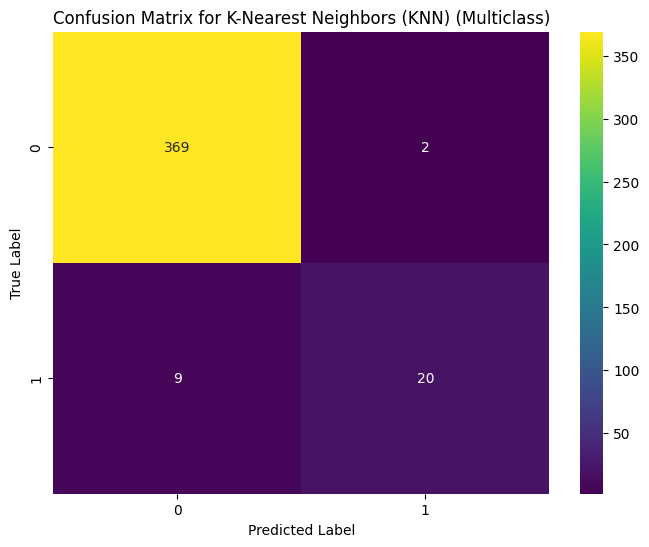

In [8]:
# Import necessary libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Used for unique class labels

# --- Evaluation for K-Nearest Neighbors (KNN) ---
model_name = 'K-Nearest Neighbors (KNN)'
predictions = knn_predictions # <--- CHANGED: Use KNN predictions here

print(f"\n--- Evaluation for {model_name} ---")

# FIX: Add average='weighted' to handle the multiclass target variable
average_setting = 'weighted'

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=average_setting)
recall = recall_score(y_test, predictions, average=average_setting)
f1 = f1_score(y_test, predictions, average=average_setting)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and display a confusion matrix
cm = confusion_matrix(y_test, predictions)
class_labels = sorted(np.unique(y_test)) # Get class labels for axes

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar=True,
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {model_name} (Multiclass)')
plt.show()

## Hyperparameter tuning


In [9]:
# Import necessary tools
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid for KNN tuning
# We test a range of k values (n_neighbors) and different distance metrics/weighting schemes.
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], # Test different values for k
    'weights': ['uniform', 'distance'], # 'distance' weights nearer neighbors more heavily
    'metric': ['euclidean', 'manhattan'] # Different distance calculation methods
}

# Define the base model
base_knn_model = KNeighborsClassifier()
print("\n--- Starting Hyperparameter Tuning for K-Nearest Neighbors (Grid Search) ---")


--- Starting Hyperparameter Tuning for K-Nearest Neighbors (Grid Search) ---


In [10]:
# 2. Instantiate GridSearchCV
# Setting n_jobs=2 to prevent MemoryError (as previously discussed)
tuner_knn = GridSearchCV(
    estimator=base_knn_model,
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=2,  # Use a low number to limit memory usage
    verbose=2
)

In [11]:
# 3. Perform the tuning on the training data
tuner_knn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# 4. Print the best results and get the best model
print("\nBest parameters found for KNN: ", tuner_knn.best_params_)
print("Best cross-validation score (Accuracy): ", tuner_knn.best_score_)

tuned_knn_model = tuner_knn.best_estimator_

In [ ]:
# 5. Evaluate the tuned model on the test set
tuned_knn_predictions = tuned_knn_model.predict(X_test)

# --- Evaluation for Tuned KNN ---
model_name = 'Tuned K-Nearest Neighbors (KNN)'
predictions = tuned_knn_predictions
average_setting = 'weighted' # Required for multiclass targets

print(f"\n--- Evaluation for {model_name} ---")

# Calculate metrics (using average='weighted')
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=average_setting)
recall = recall_score(y_test, predictions, average=average_setting)
f1 = f1_score(y_test, predictions, average=average_setting)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision ({average_setting}): {precision:.4f}")
print(f"Recall ({average_setting}): {recall:.4f}")
print(f"F1-Score ({average_setting}): {f1:.4f}")

In [ ]:
# 6. Generate and display the Confusion Matrix
cm = confusion_matrix(y_test, predictions)
class_labels = sorted(np.unique(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='inferno', # A different colormap for variety
    cbar=True,
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

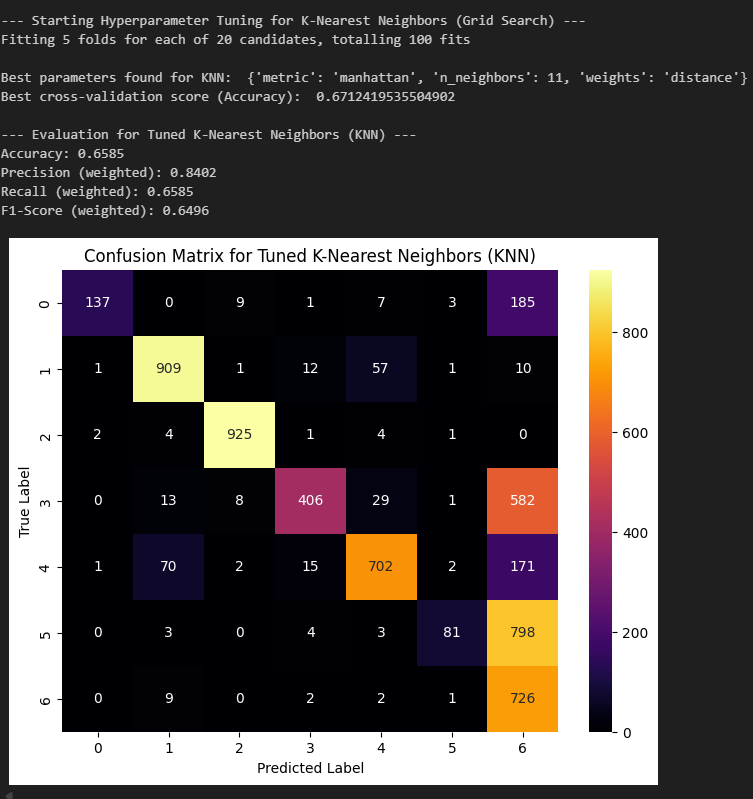

### Logistic Regression Classifier

In [ ]:
# TODO: Import the LogisticRegression from sklearn.linear_model
# Example: from sklearn.linear_model import LogisticRegression


# TODO: Instantiate the LogisticRegression classifier.
# You can start with default parameters or experiment with some initial values.
# Example: lr_model = LogisticRegression(random_state=42)


# TODO: Train the Logistic Regression classifier using the training data (X_train and y_train).
# Example: lr_model.fit(X_train, y_train)
# write your code here


# TODO: Make predictions on the test set (X_test).
# Example: lr_predictions = lr_model.predict(X_test)



In [12]:
# TODO: Import the LogisticRegression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, lr_predictions)
precision = precision_score(y_test, lr_predictions)
recall = recall_score(y_test, lr_predictions)
F1 = f1_score(y_test, lr_predictions)
print("Accuracy Score : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 - Score : ",f1)

Accuracy Score :  0.9925
Precision :  1.0
Recall :  0.896551724137931
F1 - Score :  0.9707412497709365
